In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import cv2
import imghdr
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model


In [ ]:
class Trainer:
    def __init__(self, data_set_train, data_set_test):
        self.data_set = data_set_train
        self.train = 0
        self.val = 0
        self.test = data_set_test
        self.model = Sequential()
        self.history = 0
    
    def group_data(self, training, validation):
        train_size = int(len(self.data_set)*.7)
        val_size = int(len(self.data_set)*.3)
        
        self.train = self.data_set.take(train_size)
        self.val = self.data_set.skip(train_size).take(val_size)
        
    def build_neural_network_layers(self):
        self.model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
        self.model.add(MaxPooling2D())
        self.model.add(Conv2D(32, (3,3), 1, activation='relu'))
        self.model.add(MaxPooling2D())
        self.model.add(Conv2D(16, (3,3), 1, activation='relu'))
        self.model.add(MaxPooling2D())
        self.model.add(Flatten())
        self.model.add(Dense(256, activation='relu'))
        self.model.add(Dense(1, activation='sigmoid'))
        self.model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

    def start(self, epoch):
        self.history = self.model.fit(self.train, epochs=epoch, validation_data=self.val)
    def save(self, path):
        self.modelsmodel.save(os.path.join('models','imageclassifier.h5'))
        new_model = load_model('imageclassifier.h5')
        
    def plot_history(self):
        # plot loss
        fig = plt.figure()
        plt.plot(self.history.history['loss'], color='teal', label='loss')
        plt.plot(self.history.history['val_loss'], color='orange', label='val_loss')
        fig.suptitle('Loss', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()
        # plot accuracy
        fig = plt.figure()
        plt.plot(self.history.history['accuracy'], color='teal', label='accuracy')
        plt.plot(self.history.history['val_accuracy'], color='orange', label='val_accuracy')
        fig.suptitle('Accuracy', fontsize=20)
        plt.legend(loc="upper left")
        plt.show()
        
    def testing(self):
        pre = Precision()
        re = Recall()
        acc = BinaryAccuracy()
        for batch in self.test.as_numpy_iterator(): 
            X, y = batch
            yhat = self.model.predict(X)
            pre.update_state(y, yhat)
            re.update_state(y, yhat)
            acc.update_state(y, yhat)
        print(pre.result(), re.result(), acc.result())
   


In [ ]:
training_data = tf.keras.utils.image_dataset_from_directory('augmented_datasets_train_transformed')
testing_data = tf.keras.utils.image_dataset_from_directory('augmented_datasets_validation')
data_set = training_data.as_numpy_iterator()
data_set_testing = testing_data.as_numpy_iterator()
training_data = training_data.map(lambda x,y: (x/255, y))
testing_data = testing_data.map(lambda x,y: (x/255, y))


In [5]:
trainer = Trainer(training_data, testing_data)

In [6]:
trainer.group_data(7, 2)

In [7]:
trainer.build_neural_network_layers()

In [8]:
trainer.start(2)

Epoch 1/2
173/173 [==============================] - 119s 678ms/step - loss: -1522650880.0000 - accuracy: 0.1290 - val_loss: -11582657536.0000 - val_accuracy: 0.1170
Epoch 2/2
173/173 [==============================] - 121s 700ms/step - loss: -230684295168.0000 - accuracy: 0.1284 - val_loss: -798318919680.0000 - val_accuracy: 0.1170


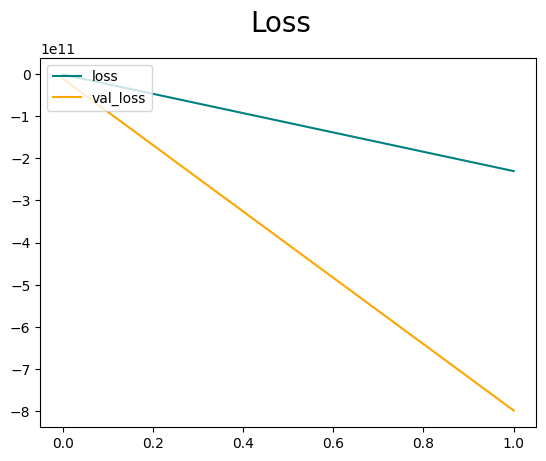

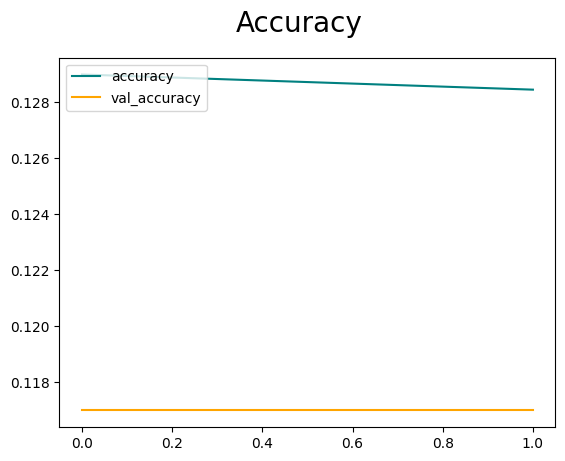

In [9]:
trainer.plot_history()

In [10]:
trainer.history

In [11]:
trainer.testing()

1/1 [==============================] - 0s 86ms/step
tf.Tensor(0.875, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.125, shape=(), dtype=float32)


[ WARN:0@324.424] global loadsave.cpp:248 findDecoder imread_('154006829.jpg'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

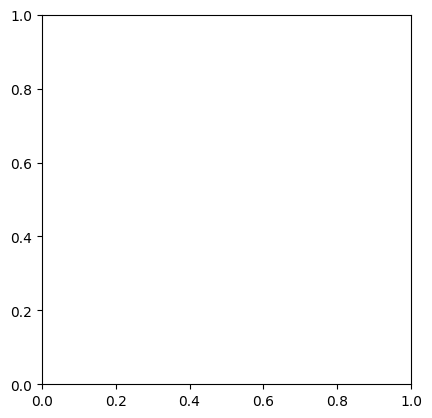

In [12]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:
print("hi)